In [61]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
from tqdm import tqdm
import math
import random
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

def imshow(img):    # unnormalize
    img = (img - img.min())/(img.max()-img.min())
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [62]:

trainX = torch.load("csci-ua-473-intro-to-machine-learning-fall22/train/train/trainX.pt")
trainY = torch.load("csci-ua-473-intro-to-machine-learning-fall22/train/train/trainY.pt")
trainY = trainY[0].float()
rgb_img = trainX[0]
depth_img = trainX[1]


z = depth_img.reshape(3396,3,1,224,224)
rgbd_img = torch.cat((rgb_img, z),2)

mean, std = rgbd_img.mean([3,4]), rgbd_img.std([3,4])
normalized_rgbd_img = (rgbd_img - mean[:,:,:,None,None])/std[:,:,:,None,None]


In [63]:

train_data = TensorDataset(normalized_rgbd_img,trainY)
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)


In [64]:
# Uncomment of the following block to run

In [65]:
class Net(nn.Module):

    def __init__(self,
                 conv_layers=2,
                 linear_layers=3,
                 in_channels=4,
                 out_channels=3,
                 kernel_size=5,
                 h_dim=120,
                 stride=1,
                 padding=0,
                 dilation=1):
        super(Net, self).__init__()
        self.in_channels=in_channels
        self.out_channels=out_channels
        self.kernel_size=kernel_size
        self.stride=stride
        self.padding=padding
        self.dilation=dilation
        self.h_dim=h_dim
        self.convs = torch.nn.Sequential()
        self.linear = torch.nn.Sequential()
        self.conv_layers=conv_layers
        self.linear_layers=linear_layers

        in_c = in_channels
        out_c = out_channels
        for layer in range(conv_layers):
            self.convs.add_module("convs%d" % (layer),nn.Conv2d(in_c, out_c,kernel_size))
            self.convs.add_module("convs_relu%d" % (layer), nn.ReLU())
            self.convs.add_module("pool%d" % layer, nn.MaxPool2d(2,2))
            in_c = out_c

        in_d = 8427 # fix this 
        for layer in range(linear_layers-1):
            self.linear.add_module("mlp_%d" % (layer),nn.Linear(in_d,h_dim))
            self.linear.add_module("mlp_relu%d" % (layer), nn.ReLU())
            in_d = h_dim
        self.linear.add_module("mlp_%d" % (layer + 1), nn.Linear(in_d, 12))

    def forward(self,x):

        x = self.convs(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)
        return x
    
net = Net()

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
Loss = []
for epoch in range(10):
    running_loss = 0.
    for i, data in tqdm(enumerate(train_dataloader)):
        inputs, labels = data
        for view in range(3):
            view_inputs = inputs[:,view,:,:]
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(view_inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            Loss.append(loss.item())
            if i % 20 == 19:  # print every 20 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
                running_loss = 0.0

print('Finished Training')

19it [00:58,  3.07s/it]

[1,    20] loss: 0.006
[1,    20] loss: 0.000


20it [01:01,  3.07s/it]

[1,    20] loss: 0.000


39it [02:00,  3.09s/it]

[1,    40] loss: 0.001
[1,    40] loss: 0.000


40it [02:03,  3.06s/it]

[1,    40] loss: 0.000


54it [02:42,  3.02s/it]
19it [00:55,  2.95s/it]

[2,    20] loss: 0.001
[2,    20] loss: 0.000


20it [00:58,  2.94s/it]

[2,    20] loss: 0.000


39it [01:55,  2.97s/it]

[2,    40] loss: 0.000
[2,    40] loss: 0.000


40it [01:58,  2.96s/it]

[2,    40] loss: 0.000


54it [02:37,  2.91s/it]
19it [00:56,  2.99s/it]

[3,    20] loss: 0.000
[3,    20] loss: 0.000


20it [00:59,  2.98s/it]

[3,    20] loss: 0.000


39it [01:56,  2.98s/it]

[3,    40] loss: 0.000
[3,    40] loss: 0.000


40it [01:59,  2.97s/it]

[3,    40] loss: 0.000


54it [02:38,  2.94s/it]
19it [00:56,  2.96s/it]

[4,    20] loss: 0.000
[4,    20] loss: 0.000


20it [00:59,  2.96s/it]

[4,    20] loss: 0.000


39it [01:55,  2.99s/it]

[4,    40] loss: 0.000
[4,    40] loss: 0.000


40it [01:58,  2.98s/it]

[4,    40] loss: 0.000


54it [02:37,  2.92s/it]
19it [00:55,  2.96s/it]

[5,    20] loss: 0.000
[5,    20] loss: 0.000


20it [00:58,  2.95s/it]

[5,    20] loss: 0.000


39it [01:55,  3.00s/it]

[5,    40] loss: 0.000
[5,    40] loss: 0.000


40it [01:58,  2.98s/it]

[5,    40] loss: 0.000


54it [02:38,  2.93s/it]
19it [00:56,  2.97s/it]

[6,    20] loss: 0.000
[6,    20] loss: 0.000


20it [00:59,  2.96s/it]

[6,    20] loss: 0.000


39it [01:56,  3.02s/it]

[6,    40] loss: 0.000
[6,    40] loss: 0.000


40it [01:59,  3.04s/it]

[6,    40] loss: 0.000


54it [02:39,  2.96s/it]
19it [00:57,  3.01s/it]

[7,    20] loss: 0.000
[7,    20] loss: 0.000


20it [01:00,  3.00s/it]

[7,    20] loss: 0.000


39it [01:58,  3.15s/it]

[7,    40] loss: 0.000
[7,    40] loss: 0.000


40it [02:01,  3.13s/it]

[7,    40] loss: 0.000


54it [02:41,  2.98s/it]
19it [00:57,  3.09s/it]

[8,    20] loss: 0.000
[8,    20] loss: 0.000


20it [01:00,  3.13s/it]

[8,    20] loss: 0.000


39it [02:00,  3.14s/it]

[8,    40] loss: 0.000
[8,    40] loss: 0.000


40it [02:03,  3.13s/it]

[8,    40] loss: 0.000


54it [02:44,  3.05s/it]
19it [00:59,  3.15s/it]

[9,    20] loss: 0.000
[9,    20] loss: 0.000


20it [01:02,  3.14s/it]

[9,    20] loss: 0.000


39it [02:02,  3.15s/it]

[9,    40] loss: 0.000
[9,    40] loss: 0.000


40it [02:05,  3.14s/it]

[9,    40] loss: 0.000


54it [02:46,  3.08s/it]
19it [00:59,  3.15s/it]

[10,    20] loss: 0.000
[10,    20] loss: 0.000


20it [01:02,  3.13s/it]

[10,    20] loss: 0.000


39it [02:02,  3.15s/it]

[10,    40] loss: 0.000
[10,    40] loss: 0.000


40it [02:05,  3.13s/it]

[10,    40] loss: 0.000


54it [02:46,  3.09s/it]

Finished Training


In [66]:
# class Net2(nn.Module):
#     def __init__(self, 
#                  kernel_size, 
#                  stride, 
#                  padding, 
#                  dilation,
#                  pooling_kernel_size,
#                  pooling_stride,
#                  pooling_padding,
#                  pooling_dilation,
#                  num_linear_layers=3, 
#                  out_dim=12,
#                  pooling=True,
#                  num_conv_layers=3, 
#                  in_channels=4, 
#                  z_dim=512, 
#                  in_height=224, 
#                  in_width=224, 
#                  filter_size=8):
        
#         super(Net2, self).__init__()
#         self.z_dim=z_dim
#         self.in_channels = in_channels
#         self.filter_size = filter_size

#         self.convs = torch.nn.Sequential()
#         self.linear = torch.nn.Sequential()
#         mul = 1
#         in_dim = in_channels
#         for _ in range(num_conv_layers):
#             self.convs.add_module("conv_%d" % (_), (nn.Conv2d(in_dim, filter_size * mul, kernel_size=kernel_size, stride=stride, padding=padding)))
#             self.convs.add_module("bn_1%d" % (_), nn.BatchNorm2d(filter_size * mul))
#             self.convs.add_module("conv_relu%d" % (_), nn.ReLU())
#             in_dim = filter_size * mul
#             mul *= 2
#             # compute conv2d output dimension 
#             in_height = math.floor((in_height + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) / stride[0] + 1)
#             in_width = math.floor((in_width + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) / stride[1] + 1)
            
            
#             # compute maxpool2D output dimension
#             if pooling:
#                 self.convs.add_module("pool%d" % (_), nn.MaxPool2d(pooling_kernel_size, pooling_stride,pooling_padding,pooling_dilation))
#                 in_height = math.floor((in_height + 2 * pooling_padding[0] - pooling_dilation[0] * (pooling_kernel_size[0] - 1) - 1) / pooling_stride[0] + 1)
#                 in_width = math.floor((in_width + 2 * pooling_padding[1] - pooling_dilation[1] * (pooling_kernel_size[1] - 1) - 1) / pooling_stride[1] + 1)
                
#         self.h_dim = [in_dim,in_width,in_height]

#         in_dim = self.h_dim[0] * self.h_dim[1] * self.h_dim[2]
#         for _ in range(num_linear_layers-1):
#             self.linear.add_module("lienar_%d"%(_), nn.Linear(in_dim,z_dim))
#             self.linear.add_module("linear_relu%d" % (_), nn.ReLU())
#             in_dim = z_dim
#         self.linear.add_module("lienar_%d"%(_+1), nn.Linear(in_dim,out_dim))

#     def forward(self,x):

#         x = self.convs(x)
#         x = x.view(x.size(0), -1)
#         x = self.linear(x)
#         return x

# num_layers = 4
# z_dim=128
# filter_size=64

# kernel_size = [5,5]
# stride = [1] * 2 # if can also be [[2,2] * num_layers] --> stride[_][0]
# padding = [0] * 2
# dilation = [1] * 2

# pooling_kernel_size = [2,2]
# pooling_stride = [2] * 2 # if can also be [[2,2] * num_layers] --> stride[_][0]
# pooling_padding = [0] * 2
# pooling_dilation = [1] * 2

# in_channels = 1
# in_height = in_width = 224
# lr=1e-3

# net2 =  Net2(num_conv_layers=num_layers,
#             num_linear_layers=num_layers,
#             in_height = in_height,
#             dilation=dilation,
#             in_width=in_width ,
#             kernel_size=kernel_size,
#             stride=stride, padding=padding,
#             z_dim=z_dim,
#             filter_size=filter_size,
#             pooling_kernel_size = pooling_kernel_size,
#             pooling_stride = pooling_stride,
#             pooling_padding = pooling_padding,
#             pooling_dilation = pooling_dilation
#           )

# criterion = nn.MSELoss()
# optimizer = optim.Adam(net2.parameters(), lr=0.001)
# Loss = []
# for epoch in range(10):
#     running_loss = 0.
#     for i, data in tqdm(enumerate(train_dataloader)):
#         inputs, labels = data
#         for view in range(3):
#             view_inputs = inputs[:,view,:,:]
#             # zero the parameter gradients
#             optimizer.zero_grad()

#             # forward + backward + optimize
#             outputs = net2(view_inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             # print statistics
#             running_loss += loss.item()
#             Loss.append(loss.item())
#             if i % 20 == 19:  # print every 20 mini-batches
#                 print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
#                 running_loss = 0.0

# print('Finished Training')

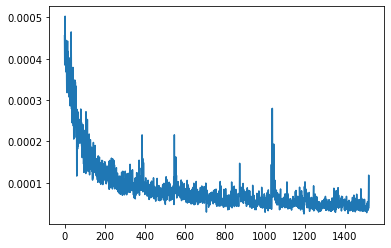

In [67]:
plt.plot(Loss[100:])

In [69]:
test_dir = "csci-ua-473-intro-to-machine-learning-fall22/test/test/testX.pt"
testX = torch.load(test_dir)
rgb_img = testX[0]
depth_img = testX[1]

z = depth_img.reshape(849, 3, 1, 224, 224)
rgbd_img = torch.cat((rgb_img, z), 2)

mean, std = rgbd_img.mean([3, 4]), rgbd_img.std([3, 4])
normalized_rgbd_img = (rgbd_img - mean[:, :, :, None, None]) / std[:, :, :, None, None]
test_dataloader = DataLoader(normalized_rgbd_img, batch_size=64, shuffle=False)

In [70]:



import pickle
import pandas as pd

outfile = 'submission.csv'
file_ids = [int(Id) for Id in testX[-1]]
output_file = open(outfile, 'w')

titles = ['ID', 'FINGER_POS_1', 'FINGER_POS_2', 'FINGER_POS_3', 'FINGER_POS_4', 'FINGER_POS_5', 'FINGER_POS_6',
         'FINGER_POS_7', 'FINGER_POS_8', 'FINGER_POS_9', 'FINGER_POS_10', 'FINGER_POS_11', 'FINGER_POS_12']
preds = []


for i, data in tqdm(enumerate(test_dataloader)):
        inputs = data
        view_inputs = inputs[:,0,:,:]
        outputs = net(view_inputs)
        preds.append(outputs.detach().numpy())


14it [00:08,  1.67it/s]


In [71]:
preds = pd.DataFrame(np.vstack(preds))
df = pd.concat([pd.DataFrame(file_ids), preds], axis = 1, names = titles)
df.columns = titles
df.to_csv(outfile, index = False)
print("Written to csv file {}".format(outfile))

Written to csv file submission.csv


In [5]:
data = next(iter(train_dataloader))